<a href="https://colab.research.google.com/github/shah-zeb-naveed/course-nlp/blob/master/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Steps in NLP:
# - cleaning
# - pos tagging first as lemmatization depends on it
# - nltk.tokenize.sent_tokenize/word_tokenize/RegexpTokenizer(x) (rules for
# tokenization like special chars, white space, exceptions like U.S.A etc)
# nltk/spacy for preprocessing
#

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- what is gensim?
topic modelling: extract smenatic topics
gensim algos (Word2Vec, Latent Semantic Indexing, LDA, etc.) discover semantic structure of documeents. Gensim supports streaming so all data in RAM not required



In [ ]:
# https://www.sbert.net/docs/sentence_transformer/pretrained_models.html
# https://pberba.github.io/stats/2020/07/08/intro-hdbscan/

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
%pip install --upgrade pyLDAvis scikit-learn hdbscan --quiet --progress-bar off

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
%pip install scipy==1.10.1 svgling

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import scipy
assert scipy.__version__ == '1.10.1'
from __future__ import print_function
import pyLDAvis
#import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import os
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
import re

#import torch
#from sentence_transformers import SentenceTransformer
#from bertopic import BERTopic
#from umap import UMAP

import hdbscan
import logging
logging.basicConfig()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Define docs

In [ ]:
from sklearn.datasets import fetch_20newsgroups
# docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data'][0:1000]

docs = [
    "The Eiffel Tower is a wrought-iron lattice tower on the Champ de Mars in Paris, France.",
    "The tower is 324 meters tall, about the same height as an 81-story building.",
    "It held this title for 41 years until the Chrysler Building in New York City was finished in 1930.",
    "The tower has three levels for visitors, with restaurants on the first and second levels.",
    "Tickets can be purchased to ascend by stairs or lift to the first and second levels.",
]


# # Save the documents to disk
# with open('docs.pkl', 'wb') as file:
#     pickle.dump(docs, file)

docs[0:1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['The Eiffel Tower is a wrought-iron lattice tower on the Champ de Mars in Paris, France.']

In [ ]:
# with open('docs.pkl', 'rb') as file:
#     docs = pickle.load(file)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vectorizer = CountVectorizer()
vectorizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CountVectorizer()

In [ ]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]
X = vectorizer.fit_transform(corpus)
X

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [ ]:
analyze = vectorizer.build_analyzer()
analyze("This is a text document to analyze.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['this', 'is', 'text', 'document', 'to', 'analyze']

In [ ]:
vectorizer.get_feature_names_out()

X.toarray()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [ ]:
vectorizer.transform(['Something completely new.']).toarray() # ignored

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
# to preserve ordering to some extent can use bigrams
bigram_counts = CountVectorizer(ngram_range=(1,2))
bigram_counts.fit_transform(corpus).toarray()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]])

In [ ]:
bigram_counts.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['and', 'and the', 'document', 'first', 'first document', 'is',
       'is the', 'is this', 'one', 'second', 'second document',
       'second second', 'the', 'the first', 'the second', 'the third',
       'third', 'third one', 'this', 'this is', 'this the'], dtype=object)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)

transformer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TfidfTransformer(smooth_idf=False)

In [ ]:
counts = [[3, 0, 1],
          [2, 0, 0],
          [3, 0, 0],
          [4, 0, 0],
          [3, 2, 0],
          [3, 0, 2]]
tfidf = transformer.fit_transform(counts)
tfidf

tfidf.toarray() # each row a unit vector normalzied by eculidean norm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<6x3 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

array([[0.81940995, 0.        , 0.57320793],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.47330339, 0.88089948, 0.        ],
       [0.58149261, 0.        , 0.81355169]])

In [ ]:
transformer = TfidfTransformer()
transformer.fit_transform(counts).toarray()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.85151335, 0.        , 0.52433293],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.55422893, 0.83236428, 0.        ],
       [0.63035731, 0.        , 0.77630514]])

In [ ]:
transformer.idf_ # weifhts of each feature

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([1.        , 2.25276297, 1.84729786])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(corpus).toarray()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.        , 0.43877674, 0.54197657, 0.43877674, 0.        ,
        0.        , 0.35872874, 0.        , 0.43877674],
       [0.        , 0.27230147, 0.        , 0.27230147, 0.        ,
        0.85322574, 0.22262429, 0.        , 0.27230147],
       [0.55280532, 0.        , 0.        , 0.        , 0.55280532,
        0.        , 0.28847675, 0.55280532, 0.        ],
       [0.        , 0.43877674, 0.54197657, 0.43877674, 0.        ,
        0.        , 0.35872874, 0.        , 0.43877674]])

In [ ]:
# short texts noisty tfidf. binary occurrence as used in naive bayes can be set in CountVectorizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# bow: cannot capture phrases/multi-words although can use ngrams, order, grammaer, potential misspellings, word derivations
# chars can help in misspellings

ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 2))
counts = ngram_vectorizer.fit_transform(['words', 'wprds'])
ngram_vectorizer.get_feature_names_out()
counts.toarray().astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([' w', 'ds', 'or', 'pr', 'rd', 's ', 'wo', 'wp'], dtype=object)

array([[1, 1, 1, 0, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 1, 0, 1]])

In [ ]:
ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(3, 3))
ngram_vectorizer.fit_transform(['jumpy fox'])
ngram_vectorizer.get_feature_names_out()


# across words. more noisy than white-space aware char_wb
ngram_vectorizer = CountVectorizer(analyzer='char', ngram_range=(3, 3))
ngram_vectorizer.fit_transform(['jumpy fox'])
ngram_vectorizer.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<1x8 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

array([' fo', ' ju', 'fox', 'jum', 'mpy', 'ox ', 'py ', 'ump'],
      dtype=object)

<1x7 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

array([' fo', 'fox', 'jum', 'mpy', 'py ', 'ump', 'y f'], dtype=object)

In [ ]:
ngram_vectorizer.vocabulary_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'jum': 2, 'ump': 5, 'mpy': 3, 'py ': 4, 'y f': 6, ' fo': 0, 'fox': 1}

In [ ]:
ngram_vectorizer.get_stop_words()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## One-Hot Encoding

In [ ]:
import torch

# Sample corpus
corpus = ["hello world", "hello", "world hello"]

# Step 1: Build the vocabulary
# Create a set of unique words
vocab = set()
for sentence in corpus:
    vocab.update(sentence.split())

# Create a word-to-index dictionary
word_to_index = {word: idx for idx, word in enumerate(vocab)}

# Step 2: Create one-hot representations
def one_hot_encode(word, word_to_index):
    """
    Create a one-hot vector for the given word.
    """
    vector = torch.zeros(len(word_to_index), dtype=torch.float32)
    vector[word_to_index[word]] = 1.0
    return vector

# Encode the entire corpus
one_hot_encoded_corpus = []
for sentence in corpus:
    encoded_sentence = []
    for word in sentence.split():
        encoded_sentence.append(one_hot_encode(word, word_to_index))
    one_hot_encoded_corpus.append(encoded_sentence)

one_hot_encoded_corpus

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[tensor([1., 0.]), tensor([0., 1.])],
 [tensor([1., 0.])],
 [tensor([0., 1.]), tensor([1., 0.])]]

In [ ]:
ord('A')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


65

# Embeddings

Word2vec (Google) - 2 techniques: Continuous Bag of Words (CBoW) and Skip-Gram;
Bow: use context of window size m to predict target. softmax layer and negative log-likelihood given context to train. faster.

Skip-gram: use center to predict context in window size m to predict context words. one output layer + softmax predicts (center, context) pair. Avg. neg. log likelihood to train. better for infrequent words.

Goal is to learn weights that are the vectors. Both Can use negative sampling to optimize (better for frequent). Hierarchical softmax (better for infrequent words).
Linear substructures like vector(man) - vector(woman) + vector(king) = vector(queen). Can average embeddings of multiple words to find closest vectors during inference.


Global Vectors or GloVe (Stanford); trained on co-occurence/frequency matrix of word pairs. Can use KNN to get similar words. Linear substructurs: vector difference of man-woman is similar to king-queen. This is encoded as its trained so its dot product equals log of prob ratio. This encodes meaning of the word e.g. ice/steam/gas/water example.

fastText (Facebook) —interesting fact: accounts for out of vocabulary words.


In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Example sentences
sentences = [
    "the quick brown fox jumps over the lazy dog",
    "I love natural language processing",
    "word2vec is a cool technique"
]

# Tokenize sentences
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Train Word2Vec model using CBOW
model_cbow = Word2Vec(tokenized_sentences, vector_size=100, window=2, min_count=1, sg=0) # switch skip-gram

# Get the word vector for a word
vector = model_cbow.wv['fox']
print(vector)

# Find most similar words
similar_words = model_cbow.wv.most_similar('fox')
print(similar_words)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [ ]:
# # use pre-trained

# import gensim.downloader as api

# # Load the pre-trained Word2Vec model (Google's pretrained model)
# model = api.load("word2vec-google-news-300")
# model.most_similar('fox')

## Doc2Vec

- based on word2vec, shallow network. random init doc vvector to predict a sample of words in that document. results in static embeddings, treats all context words equally regardless of order/sposition. BERT is bidirection (processes words right and left), is deep, finetuend on sentence similarity, higher scores in benchmakrs,

In [ ]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Example documents
documents = [
    "I love machine learning.",
    "Gensim is a useful library for NLP.",
    "Doc2Vec is an extension of Word2Vec.",
    "This is an example document."
]

# Preprocess and tag the documents
tagged_documents = [TaggedDocument(words=doc.split(), tags=[str(i)]) for i, doc in enumerate(documents)]

# Initialize and train the Doc2Vec model
model = Doc2Vec(vector_size=50, window=2, min_count=1, workers=4, epochs=100)

# Build the vocabulary
model.build_vocab(tagged_documents)

# Train the model
model.train(tagged_documents, total_examples=model.corpus_count, epochs=model.epochs)

# Inference: Get the vector for a new document
new_doc = "Machine learning is fascinating."
new_vec = model.infer_vector(new_doc.split())

# Print the vector
print(f"Vector for the new document: {new_vec}")


## Spacy

In [ ]:
!python -m spacy download en_core_web_md

In [ ]:
# brief chatgpt example:

import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load the SpaCy English model
nlp = spacy.load("en_core_web_md")

# Example set of documents
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
    "This is not a document.",
    "We have more documents to explore."
]

# Function to convert documents to vectors
def document_vectors(documents):
    doc_vectors = []
    for doc in documents:
        doc_vector = nlp(doc).vector
        doc_vectors.append(doc_vector)
    return np.array(doc_vectors)

# Convert documents to vectors
doc_vectors = document_vectors(documents)

# Test document
test_doc = "More documents should be explored."

# Convert test document to vector
test_doc_vector = nlp(test_doc).vector

# Calculate cosine similarity between test document and each document in the set
similarities = cosine_similarity([test_doc_vector], doc_vectors)[0]

# Retrieve indices of most similar documents
most_similar_indices = similarities.argsort()[:-4:-1]

# Print most similar documents
print("Most similar documents to the test document:")
for idx in most_similar_indices:
    print(f"Document {idx}: {documents[idx]}")


In [ ]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.dep_, token.tag_, token.has_vector, token.vector_norm)

for ent in doc.ents:
  print(ent.text, ent.label_)

In [ ]:
doc1 = nlp("I like salty fries and hamburgers.")
doc2 = nlp("Fast food tastes very good.")

# Similarity of two documents
print(doc1, "<->", doc2, doc1.similarity(doc2))
# Similarity of tokens and spans
french_fries = doc1[2:4]
burgers = doc1[5]
print(french_fries, "<->", burgers, french_fries.similarity(burgers))


# Misc

In [ ]:
import numpy as np

def cosine_similarity(vec1, vec2):
    """Calculate the cosine similarity between two vectors."""
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

# Example vectors
vec1 = np.array([1, 2, 3])
vec2 = np.array([4, 5, 6])

# Calculate cosine similarity
similarity = cosine_similarity(vec1, vec2)
print(f"Cosine Similarity: {similarity}")


In [ ]:
from collections import Counter
Counter('A quick brown fox jumps')

Counter(['Abc', 'def'])

# NLTK Stuff

In [ ]:
import string
puncs = set(string.punctuation)
print(puncs)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
stop_words = set(stopwords.words('english')) # can also just specify in sklearn
len(stop_words)

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess(doc):
  tokens = [lemmatizer.lemmatize(word.lower()) for word in doc.split(' ') if word not in stop_words and word not in puncs]
  return tokens

tokenized_docs = [preprocess(doc) for doc in docs]
print(tokenized_docs)

In [ ]:
# since already tokenized, if wanna create BoW, can use:

vectorizer = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False, smooth_idf=True, stop_words="english")
tfidf_matrix = vectorizer.fit_transform(tokenized_docs)

tfidf_matrix.toarray().shape
print(tfidf_matrix.toarray())

In [ ]:
nltk.download('punkt')

# for better handling of ambiguous situations like U.S.A.

from nltk.tokenize import sent_tokenize, word_tokenize

text = "Natural language processing is an exciting area. Huge budget have been allocated for this."
print(sent_tokenize(text))
print(word_tokenize(text))

In [ ]:
# pos tagging

nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag, word_tokenize, RegexpParser

# Find all parts of speech in above sentence
tagged = pos_tag(word_tokenize(text))
tagged

## Parse Trees

In [ ]:
# empty grammar example

# Extract all parts of speech from any text
chunker = RegexpParser("""
                    NP: {} # To extract Noun Phrases
                    P: {}    # To extract Prepositions
                    V: {}    # To extract Verbs
                    PP: {}   # To extract Prepositional Phrases
                    VP: {}   # To extract Verb Phrases
                    """)

# Print all parts of speech in above sentence
output = chunker.parse(tagged)
print("After Extracting\n", output)


# output.draw() display error
display(output)

# another set of grammar rules:

#Extract all parts of speech from any text
chunker = RegexpParser("""
                    NP: {<DT>?<JJ>*<NN>} #To extract Noun Phrases
                    P: {<IN>}            #To extract Prepositions
                    V: {<V.*>}           #To extract Verbs
                    PP: {<p> <NP>}       #To extract Prepositional Phrases
                    VP: {<V> <NP|PP>*}   #To extract Verb Phrases
                    """)

# Print all parts of speech in above sentence
output = chunker.parse(tagged)
print("After Extracting\n", output)

# output.draw() display error
display(output)

In [ ]:
import nltk
from nltk import CFG

# CFGs can not be used with english as its not as expressive.

# Define a context-free grammar
grammar = CFG.fromstring("""
    S -> NP VP
    NP -> Det N | 'I'
    VP -> V NP | V
    Det -> 'the' | 'a'
    N -> 'dog' | 'cat'
    V -> 'chased' | 'ate'
""")

# Create a recursive descent parser
parser = nltk.RecursiveDescentParser(grammar)

# Define a sentence to parse
sentence = "I chased the cat"

# Parse the sentence and print the parse trees
for tree in parser.parse(sentence.split()):
    print(tree)
    display(tree)


1. https://www.tutorialspoint.com/natural_language_processing/natural_language_processing_syntactic_analysis.htm
2. https://www.analyticsvidhya.com/blog/2022/03/syntactical-parsing-in-nlp/
3. https://intellipaat.com/blog/what-is-parsing-in-nlp/

In [ ]:
# P

# PyTorch

In [ ]:
t = torch.tensor([[1, 2, 3], [5, 2, 5]])
t

In [ ]:
t.t()

In [ ]:
t.shape

un_t = torch.unsqueeze(t, dim=0) # equivalent of np.expand(x, axis=0)
un_t

In [ ]:
un_t.squeeze()

In [ ]:
torch.sum(un_t).item()

In [ ]:
un_t.view(-1, 1, 1) # only one dimension can be inferred

In [ ]:
torch.zeros(2, 3, 5)

In [ ]:
x_ones = torch.ones_like(t) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(t, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = t @ t.T
y2 = t.matmul(t.T)
y1
y2

# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = t * t
z2 = t.mul(t)
z1
z2

In [ ]:
n = t.view(1,-1).squeeze().numpy()
np.dot(n, n)

In [ ]:
torch.cat((t, t), dim=1)

In [ ]:
t

In [ ]:
t[-1, 0:2]

In [ ]:
(torch.tensor([[1, 2, 0, -1]]) == 1) # masking

In [ ]:
mask = (torch.triu(torch.ones((sz, sz))) == 1).transpose(0, 1)
mask

In [ ]:
mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))

In [ ]:
torch.sigmoid(torch.tensor(5))

In [ ]:
X = torch.rand(2, 5)
X

In [ ]:
probs = torch.nn.Softmax(dim=0)(torch.tensor([9, 10, 1], dtype=float))
probs

probs.argmax(0)

In [ ]:
torch.nn.ReLU()(torch.tensor(-4))

In [ ]:
# an ordered container
seq_modules = nn.Sequential(
    torch.nn.Flatten(),
    nn.ReLU(),
    nn.Linear(784, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
logits.shape

In [ ]:
# can use within collate_fn in dataloader
import torch
from torch.nn.utils.rnn import pad_sequence

# Example list of sequences with varying lengths
sequences = [torch.tensor([1, 2, 3], dtype=torch.float),
             torch.tensor([4, 5], dtype=torch.float),
             torch.tensor([6], dtype=torch.float)]

# Pad the sequences
padded_sequence = pad_sequence(sequences, batch_first=True, padding_value=0.0)
padded_sequence

In [ ]:
# serves different purpose.
# ignores pad values and leads to better memory utilization


import torch
from torch.nn.utils.rnn import pack_padded_sequence

lengths = torch.tensor([len(t) for t in padded_sequence])

# Pack the padded sequence
packed_sequence = pack_padded_sequence(padded_sequence, lengths, batch_first=True, enforce_sorted=False)
packed_sequence

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Dataset

# can't use tensordataset directly for variable input lengths
# need to implement class

# can't init tensor on variable. otherwise, just init as tensor and use tensordataset
X = [[1, 2, 3], [5, 7], [5]]

# needed
X = list(map(torch.tensor, X))

y = torch.tensor([0, 1, 1])

# can't use for variable
#dataset = TensorDataset(X, y)

class SequenceDataset(Dataset): # just a protocol class so doesn't inherit anythinmg no super()
  def __init__(self, sequences, labels):
    self.sequences = sequences
    self.labels = labels

  def __len__(self):
    return len(self.sequences)

  def __getitem__(self, idx):
    return self.sequences[idx], self.labels[idx]

dataset = SequenceDataset(X, y)

def collate_fn(batch):
  sequences, labels = zip(*batch)
  lengths = [len(seq) for seq in sequences]
  padded = pad_sequence(sequences, batch_first=True, padding_value=0)
  return padded, lengths, labels

dataloader = DataLoader(dataset, batch_size=2, collate_fn=collate_fn)

# Iterate through DataLoader
for batch in dataloader:
    padded_sequences, lengths, labels = batch
    print("Padded Sequences:\n", padded_sequences)
    print("Lengths:\n", lengths)
    print("Labels:\n", labels)

In [ ]:
## Streaming Data

import h5py
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader


# Create an HDF5 file
with h5py.File('example3.h5', 'w') as f:
    f.create_dataset('data', data=np.arange(100), compression="gzip")
    f.create_dataset('labels', data=np.random.randint(0, 3, size=(100,)), compression="gzip")

class HDF5Dataset(Dataset):
    def __init__(self, h5_file, transform=None):
        self.file = h5_file
        self.dataset = h5py.File(h5_file, 'r')
        self.data = self.dataset['data']
        self.labels = self.dataset['labels']
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = torch.tensor(self.data[idx], dtype=torch.float32)
        y = torch.tensor(self.labels[idx], dtype=torch.long)

        if self.transform:
            x = self.transform(x)

        return x, y

# Usage example
h5_file = 'example3.h5'
dataset = HDF5Dataset(h5_file)

In [ ]:
data_loader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

# Iterate over DataLoader in training loop
for inputs, labels in data_loader:
    # Perform training step
    print(inputs)
    print('===========')

In [ ]:
import torch
import torch.nn as nn

# Define input sequence
X = torch.tensor([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]], dtype=torch.float32)

# Initialize hidden state
hidden_dim = 3
h = torch.zeros(hidden_dim)

# GRU forward pass function
gru = nn.GRU(input_size=2, hidden_size=3, batch_first=True)

# LSTM forward pass function
lstm = nn.LSTM(input_size=2, hidden_size=3, batch_first=True)

# Compute outputs using GRU
gru_output, _ = gru(X.unsqueeze(0), h.unsqueeze(0))
gru_output = gru_output.squeeze(0)[-1]  # Select last output
print("GRU Output:")
print(gru_output)

# Compute outputs using LSTM
lstm_output, _ = lstm(X.unsqueeze(0), (h.unsqueeze(0), h.unsqueeze(0)))
lstm_output = lstm_output.squeeze(0)[-1]  # Select last output
print("\nLSTM Output:")
print(lstm_output)


## LSTM

In [ ]:
import pandas as pd

# IMDb reviews data as a dictionary
imdb_reviews = {
    "review": [
        "The Shawshank Redemption is an incredible movie. The acting is superb and the storyline is captivating.",
        "I found the plot to be confusing and the acting to be mediocre. Overall, I was disappointed with the film.",
        "Great movie! The special effects were amazing and the characters were well-developed.",
        "The dialogue felt forced and unrealistic. I couldn't connect with any of the characters.",
        "The Godfather is a masterpiece. The performances are outstanding and the direction is flawless.",
        "The pacing of the film was too slow, and I found myself losing interest halfway through.",
        "Titanic is a classic love story that will tug at your heartstrings. I highly recommend it.",
        "The acting was wooden and the plot was predictable. I was not impressed.",
        "Jurassic Park is a thrilling adventure that keeps you on the edge of your seat from start to finish.",
        "I felt the movie lacked depth and the characters were one-dimensional. Overall, it was underwhelming."
    ],
    "sentiment": [
        "positive",
        "negative",
        "positive",
        "negative",
        "positive",
        "negative",
        "positive",
        "negative",
        "positive",
        "negative"
    ]
}

df = pd.DataFrame(imdb_reviews)
df = pd.concat([df, df]).reset_index(drop=True)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review,sentiment
0,The Shawshank Redemption is an incredible movi...,positive
1,I found the plot to be confusing and the actin...,negative
2,Great movie! The special effects were amazing ...,positive
3,The dialogue felt forced and unrealistic. I co...,negative
4,The Godfather is a masterpiece. The performanc...,positive
5,"The pacing of the film was too slow, and I fou...",negative
6,Titanic is a classic love story that will tug ...,positive
7,The acting was wooden and the plot was predict...,negative
8,Jurassic Park is a thrilling adventure that ke...,positive
9,I felt the movie lacked depth and the characte...,negative


In [ ]:
X, y = df['review'].values, df['sentiment'].values

from sklearn.model_selection import train_test_split

# can also use random_split() by torch on top of pytorch's dataset
# like: train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

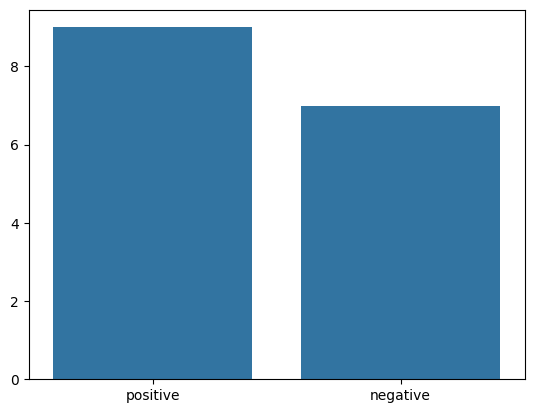

In [ ]:
import seaborn as sns

counts = pd.Series(y_train).value_counts()
sns.barplot(x=['positive', 'negative'], y=counts.values)

In [ ]:
import torch
from torch.nn.utils.rnn import pad_sequence
import string

def preprocess_word(w):
    return w.lower()

def build_vocab(X_train):
    stop_words = set(stopwords.words('english'))
    word_list = set()

    # Building the vocabulary
    for sent in X_train:
        for word in sent.lower().split():
            word = preprocess_word(word)
            if word not in stop_words and word != '' and word not in string.punctuation:
                word_list.add(word)

    vocab = {w: i for i, w in enumerate(word_list)}
    return vocab

def tokenize(sentences):
    tokenized_list = []
    for sent in sentences:
        tokenized_words = [vocab[preprocess_word(w)] for w in sent.lower().split() if preprocess_word(w) in vocab]
        if len(tokenized_words) == 0:
          print(sent)
          continue
        tokenized_list.append(torch.tensor(tokenized_words))
    return tokenized_list

def encode_labels(labels):
  return torch.tensor([1 if label == 'positive' else 0 for label in labels])


def preprocess(X_train, y_train, X_test, y_test):

    # Tokenize the sentences
    tokenized_train = tokenize(X_train)
    tokenized_test = tokenize(X_test)

    # Encode labels
    encoded_train = encode_labels(y_train)
    encoded_test = encode_labels(y_test)

    return tokenized_train, encoded_train, tokenized_test, encoded_test

vocab = build_vocab(X_train)

# Tokenize and pad the sequences
X_train_tokenized, y_train_tokenized, X_test_tokenized, y_test_tokenized = preprocess(X_train, y_train, X_test, y_test)

print(X_train_tokenized)
print(y_train_tokenized)
print(X_test_tokenized)
print(y_test_tokenized)


[tensor([17,  2,  3, 53, 65, 54, 27, 48]), tensor([17,  2,  3, 53, 65, 54, 27, 48]), tensor([ 8, 57, 42, 11, 40, 63, 54,  5]), tensor([ 9, 39, 59, 41, 28, 31, 35, 25, 19]), tensor([49,  8, 24, 36, 43,  0]), tensor([58, 64, 55, 17, 45, 60, 10, 61]), tensor([46, 47, 33,  1, 53, 34, 32, 13]), tensor([ 8, 57, 42, 11, 40, 63, 54,  5]), tensor([53, 44,  2, 26, 15]), tensor([29, 16, 23,  4, 21, 50, 22,  6, 62]), tensor([20,  7, 38, 66, 18, 37]), tensor([51, 52, 30, 12, 56, 40, 14]), tensor([49,  8, 24, 36, 43,  0]), tensor([53, 44,  2, 26, 15]), tensor([51, 52, 30, 12, 56, 40, 14]), tensor([20,  7, 38, 66, 18, 37])]
tensor([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1])
[tensor([58, 64, 55, 17, 45, 60, 10, 61]), tensor([46, 47, 33,  1, 53, 34, 32, 13]), tensor([29, 16, 23,  4, 21, 50, 22,  6, 62]), tensor([ 9, 39, 59, 41, 28, 31, 35, 25, 19])]
tensor([0, 1, 1, 1])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, Dataset

# create Tensor datasets

# using custom class for variable input
train_data = SequenceDataset(X_train_tokenized, y_train_tokenized)
valid_data = SequenceDataset(X_test_tokenized, y_test_tokenized)

# dataloaders
batch_size = 2

def collate_fn(batch):
    sentences, labels = zip(*batch)
    lengths = torch.tensor([len(sent) for sent in sentences])
    padded = pad_sequence(sentences, batch_first=True, padding_value=0)
    return padded, lengths, torch.tensor(labels)

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, collate_fn=collate_fn)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, collate_fn=collate_fn)

# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_lengths, sample_y = next(dataiter)

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample output: \n', sample_y)
print('Sample sample_lengths: \n', sample_lengths)

tensor([[46, 47, 33,  1, 53, 34, 32, 13],
        [58, 64, 55, 17, 45, 60, 10, 61]]) tensor([8, 8])
tensor([[ 8, 57, 42, 11, 40, 63, 54,  5],
        [ 8, 57, 42, 11, 40, 63, 54,  5]]) tensor([8, 8])
tensor([[53, 44,  2, 26, 15,  0],
        [49,  8, 24, 36, 43,  0]]) tensor([5, 6])
tensor([[51, 52, 30, 12, 56, 40, 14],
        [49,  8, 24, 36, 43,  0,  0]]) tensor([7, 6])
tensor([[29, 16, 23,  4, 21, 50, 22,  6, 62],
        [ 9, 39, 59, 41, 28, 31, 35, 25, 19]]) tensor([9, 9])
tensor([[20,  7, 38, 66, 18, 37],
        [20,  7, 38, 66, 18, 37]]) tensor([6, 6])
tensor([[17,  2,  3, 53, 65, 54, 27, 48],
        [17,  2,  3, 53, 65, 54, 27, 48]]) tensor([8, 8])
tensor([[51, 52, 30, 12, 56, 40, 14],
        [53, 44,  2, 26, 15,  0,  0]]) tensor([7, 5])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
class SentimentRNN(torch.nn.Module):
    def __init__(self, no_layers, vocab_size,hidden_dim,embedding_dim,output_dim,drop_prob=0.5):
        super().__init__()
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
        self.no_layers = no_layers
        self.vocab_size = vocab_size

        # embedding and LSTM layers
        self.embedding = torch.nn.Embedding(vocab_size, embedding_dim)

        #lstm: DOES NOT DEPEND ON SEQUENCE LENGTH. SHARED WEIGHTS.
        self.lstm = torch.nn.LSTM(
            input_size=embedding_dim,
            hidden_size=self.hidden_dim,
            num_layers=no_layers,
            batch_first=True #bidirectional=True
        )

        # dropout layer
        self.dropout = torch.nn.Dropout(0.3)

        # linear and sigmoid layer
        self.fc = torch.nn.Linear(self.hidden_dim, output_dim) # *2 because of bidirectional
        self.sig = torch.nn.Sigmoid()

    def forward(self, x, lengths, hidden):
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)  # shape: B x S x Feature   since batch = True

        # using packed sequences
        packed_embed = pack_padded_sequence(embeds, lengths, batch_first=True, enforce_sorted=False)

        # handles feedback loop and processes all the tokens in a sequence
        lstm_out, hidden = self.lstm(packed_embed, hidden)

        # for BILSTM: concatenate the final forward and backward hidden states
        # forward even indices, backward odd`
        # hidden_concat = torch.cat((hidden[0][-2, :, :], hidden[0][-1, :, :]), dim=1)

        # Unpack the PackedSequence
        lstm_out, _ = torch.nn.utils.rnn.pad_packed_sequence(lstm_out, batch_first=True)

        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

        """
        Reshapes the lstm_out tensor to have shape (batch_size * sequence_length, hidden_dim).
        The -1 is a placeholder that infers the appropriate size automatically based on the
        other dimension (hidden_dim). This essentially flattens the tensor so that each time step
        for each batch item is treated as an independent sample.
        """

        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)

        # sigmoid function
        sig_out = self.sig(out)

        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)

        sig_out = sig_out[:, -1] # get last batch of labels

        # return last sigmoid output and hidden state
        return sig_out, hidden

    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM

        # twice layers for BILSTM
        h0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden

    # optionally:
    # def init_weights(self):
    #     for param in self.parameters():
    #         nn.init.kaiming_uniform_(param, a=math.sqrt(5))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
no_layers = 2
vocab_size = len(vocab) + 1 # extra 1 for padding????
embedding_dim = 64
output_dim = 1
hidden_dim = 12

model = SentimentRNN(no_layers,vocab_size,hidden_dim,embedding_dim,output_dim,drop_prob=0.5)
model.to(device)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SentimentRNN(
  (embedding): Embedding(68, 64)
  (lstm): LSTM(64, 12, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=12, out_features=1, bias=True)
  (sig): Sigmoid()
)

In [ ]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()}\n")

Layer: embedding.weight | Size: torch.Size([68, 64])

Layer: lstm.weight_ih_l0 | Size: torch.Size([48, 64])

Layer: lstm.weight_hh_l0 | Size: torch.Size([48, 12])

Layer: lstm.bias_ih_l0 | Size: torch.Size([48])

Layer: lstm.bias_hh_l0 | Size: torch.Size([48])

Layer: lstm.weight_ih_l1 | Size: torch.Size([48, 12])

Layer: lstm.weight_hh_l1 | Size: torch.Size([48, 12])

Layer: lstm.bias_ih_l1 | Size: torch.Size([48])

Layer: lstm.bias_hh_l1 | Size: torch.Size([48])

Layer: fc.weight | Size: torch.Size([1, 12])

Layer: fc.bias | Size: torch.Size([1])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# loss and optimization functions

criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# function to calculate accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
clip = 5 # gradient clipping for exploding gradients
epochs = 5
valid_loss_min = np.Inf
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]


for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0

    # layers like dropout are enabled. gradients ar eclcualed. batch normalziation uses batch statistics.
    model.train()

    # initialize hidden states and cell states of LSTM
    h = model.init_hidden(batch_size)

    for inputs, lengths, labels in train_loader:
        # move to GPU
        inputs, lengths, labels = inputs.to(device), lengths.to(device), labels.to(device)

        # Creating new variables for the hidden state, otherwise we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # clear grad to prevent gradient accumulation across batches.
        model.zero_grad()

        # forward() pass. maintain operations gradient functions in DAG .grad_fn
        output, _ = model(inputs, lengths, h)  # h not used outside

        # calculate the loss
        loss = criterion(output, labels.float())
        train_losses.append(loss.item())

        # calculate gradients through backpropagation into .grad, applies chain rule
        loss.backward()

        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)

        # update weights
        optimizer.step()

        # calculating accuracy (correct labels)
        accuracy = acc(output, labels)
        train_acc += accuracy # actually correct predictions

    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model.eval()
    with torch.no_grad():
      for inputs, lengths, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        val_h = tuple([each.data for each in val_h])
        output, val_h = model(inputs, lengths, val_h)
        val_loss = criterion(output, labels.float())
        val_losses.append(val_loss.item())
        accuracy = acc(output,labels)
        val_acc += accuracy

    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}')
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')

    if epoch_val_loss <= valid_loss_min:
        torch.save(model.state_dict(), 'state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SentimentRNN(
  (embedding): Embedding(68, 64)
  (lstm): LSTM(64, 12, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=12, out_features=1, bias=True)
  (sig): Sigmoid()
)

tensor(0.5842)

tensor(0.2086)

tensor(0.4850)

tensor(0.2377)

tensor(0.4851)

tensor(0.2337)

tensor(0.2290)

tensor(0.2385)

SentimentRNN(
  (embedding): Embedding(68, 64)
  (lstm): LSTM(64, 12, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=12, out_features=1, bias=True)
  (sig): Sigmoid()
)

Epoch 1
train_loss : 0.6749618723988533 val_loss : 0.7412351071834564
train_accuracy : 56.25 val_accuracy : 25.0
Validation loss decreased (inf --> 0.741235).  Saving model ...


SentimentRNN(
  (embedding): Embedding(68, 64)
  (lstm): LSTM(64, 12, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=12, out_features=1, bias=True)
  (sig): Sigmoid()
)

tensor(0.2610)

tensor(0.5953)

tensor(0.5856)

tensor(0.2233)

tensor(0.2459)

tensor(0.2312)

tensor(0.6135)

tensor(0.2610)

SentimentRNN(
  (embedding): Embedding(68, 64)
  (lstm): LSTM(64, 12, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=12, out_features=1, bias=True)
  (sig): Sigmoid()
)

Epoch 2
train_loss : 0.6726799830794334 val_loss : 0.7346059679985046
train_accuracy : 56.25 val_accuracy : 25.0
Validation loss decreased (0.741235 --> 0.734606).  Saving model ...


SentimentRNN(
  (embedding): Embedding(68, 64)
  (lstm): LSTM(64, 12, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=12, out_features=1, bias=True)
  (sig): Sigmoid()
)

tensor(0.5951)

tensor(0.2417)

tensor(0.2241)

tensor(0.5132)

tensor(0.2310)

tensor(0.2756)

tensor(0.2606)

tensor(0.5343)

SentimentRNN(
  (embedding): Embedding(68, 64)
  (lstm): LSTM(64, 12, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=12, out_features=1, bias=True)
  (sig): Sigmoid()
)

Epoch 3
train_loss : 0.6696452423930168 val_loss : 0.7344976365566254
train_accuracy : 56.25 val_accuracy : 25.0
Validation loss decreased (0.734606 --> 0.734498).  Saving model ...


SentimentRNN(
  (embedding): Embedding(68, 64)
  (lstm): LSTM(64, 12, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=12, out_features=1, bias=True)
  (sig): Sigmoid()
)

tensor(0.4907)

tensor(0.5803)

tensor(0.5949)

tensor(0.4735)

tensor(0.2476)

tensor(0.1714)

tensor(0.4849)

tensor(0.2608)

SentimentRNN(
  (embedding): Embedding(68, 64)
  (lstm): LSTM(64, 12, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=12, out_features=1, bias=True)
  (sig): Sigmoid()
)

Epoch 4
train_loss : 0.6622307151556015 val_loss : 0.7216847538948059
train_accuracy : 56.25 val_accuracy : 25.0
Validation loss decreased (0.734498 --> 0.721685).  Saving model ...


SentimentRNN(
  (embedding): Embedding(68, 64)
  (lstm): LSTM(64, 12, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=12, out_features=1, bias=True)
  (sig): Sigmoid()
)

tensor(0.2303)

tensor(0.5942)

tensor(0.6020)

tensor(0.2881)

tensor(0.4705)

tensor(0.4952)

tensor(0.2934)

tensor(0.5120)

SentimentRNN(
  (embedding): Embedding(68, 64)
  (lstm): LSTM(64, 12, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=12, out_features=1, bias=True)
  (sig): Sigmoid()
)

Epoch 5
train_loss : 0.6562328487634659 val_loss : 0.7251012623310089
train_accuracy : 56.25 val_accuracy : 25.0


In [ ]:
def predict_text(text):
  model.eval()

  word_seq = np.array([vocab[preprocess_word(word)] for word in text.split() if preprocess_word(word) in vocab])
  length = torch.tensor([len(word_seq)])
  word_seq = np.expand_dims(word_seq, axis=0) # skipped padding. does it matter?
  inputs = torch.from_numpy(word_seq).to(device)
  batch_size = 1
  h = model.init_hidden(batch_size)
  # h = tuple([each.data for each in h]) # maybe unnecessary
  with torch.no_grad():
    output, h = model(inputs, length, h)
  probability = output.item()
  return probability

index = 0
predict_text('this movie sucks.')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.45283421874046326

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

# Pipeline / Sklearn

In [ ]:
import pandas as pd
X = pd.DataFrame(
    {'city': ['London', 'London', 'Paris', 'Sallisaw'],
     'state' : ['NY', 'NJ', 'ON', 'QB'],
     'title': ["His Last Bow", "How Watson Learned the Trick",
               "A Moveable Feast", "The Grapes of Wrath"],
     'expert_rating': [5, 3, 4, 5],
     'user_rating': [4, 5, 4, 3]})

X

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,city,state,title,expert_rating,user_rating
0,London,NY,His Last Bow,5,4
1,London,NJ,How Watson Learned the Trick,3,5
2,Paris,ON,A Moveable Feast,4,4
3,Sallisaw,QB,The Grapes of Wrath,5,3


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector

# using columntrasnformer avoids data leakage that happens if we preprocess before splitting/sklearn training.
# Also, can be parameterized.

column_trans = ColumnTransformer(
    [('categories', OneHotEncoder(dtype='int', handle_unknown='ignore'), ['city']), # list for most transformers like this one
     ('title_bow', CountVectorizer(), 'title'),
     ('standard_scaler', StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder='drop'
)

# NOTE:
# shouldn't fit before split
column_trans.fit(X)

column_trans.get_feature_names_out()

feature_set = column_trans.transform(X)#.toarray()
feature_set

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ColumnTransformer(transformers=[('categories',
                                 OneHotEncoder(dtype='int',
                                               handle_unknown='ignore'),
                                 ['city']),
                                ('title_bow', CountVectorizer(), 'title'),
                                ('standard_scaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x780a6c747e80>)])

array(['categories__city_London', 'categories__city_Paris',
       'categories__city_Sallisaw', 'title_bow__bow', 'title_bow__feast',
       'title_bow__grapes', 'title_bow__his', 'title_bow__how',
       'title_bow__last', 'title_bow__learned', 'title_bow__moveable',
       'title_bow__of', 'title_bow__the', 'title_bow__trick',
       'title_bow__watson', 'title_bow__wrath',
       'standard_scaler__expert_rating', 'standard_scaler__user_rating'],
      dtype=object)

array([[ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.90453403,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  1.        ,
         0.        , -1.50755672,  1.41421356],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.30151134,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.   

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import set_config
import joblib

# Define the pipeline
pipeline = make_pipeline(column_trans, RandomForestClassifier())

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X.drop(columns=['user_rating']),
    X['user_rating'],
    test_size=0.5,
    random_state=42
)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Save the pipeline for future use
joblib.dump(pipeline, 'pipeline.pkl')

# Later, load the pipeline and use it to make predictions on new data
pipeline_loaded = joblib.load('pipeline.pkl')

# Make predictions on new data
predictions = pipeline_loaded.predict(X_valid)
predictions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categories',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['city']),
                                                 ('title_bow',
                                                  CountVectorizer(), 'title'),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x780a6c747e80>)])),
                ('randomforestclassifier', RandomForestClassifier())])

['pipeline.pkl']

array([4, 4])

In [ ]:
from sklearn.model_selection import cross_val_score

# can use cross_val_score for pileine

scores = cross_val_score(pipeline, X.drop(columns=['user_rating']), X['user_rating'], cv=2)
print(f"Mean accuracy: {scores.mean():.2f}+/-{scores.std():.2f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Mean accuracy: 0.25+/-0.25


# LDA

In [ ]:
from hdbscan import HDBSCAN
embedding_model = "all-MiniLM-L12-v2"

In [ ]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5,
                                min_df = 1)

dtm_tf = tf_vectorizer.fit_transform(docs)
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(docs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn(


In [ ]:
dense_matrix = dtm_tf.toarray()
dense_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
dense_matrix_tfidf = dtm_tfidf.toarray()
print(dense_matrix_tfidf.shape)
dense_matrix_tfidf

(99, 213)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.31802142, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=4, random_state=0)
lda_tf.fit(dtm_tf)

# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=4, random_state=0)
lda_tfidf.fit(dtm_tfidf)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=4, random_state=0)

In [ ]:
from pyLDAvis import lda_model as psk

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
scipy.__version__

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'1.10.1'

In [ ]:
from gensim import corpora, models

# # Example corpus of documents
# corpus = [
#     "This is the first document",
#     "This document is the second document",
#     "And this is the third one",
#     "Is this the first document?"
# ]

corpus = docs.copy()

# Preprocessing the corpus
tokenized_corpus = [document.lower().split() for document in corpus]

# Creating the dictionary
dictionary = corpora.Dictionary(tokenized_corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tokenized_corpus

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['the',
  'eiffel',
  'tower',
  'is',
  'a',
  'wrought-iron',
  'lattice',
  'tower',
  'on',
  'the',
  'champ',
  'de',
  'mars',
  'in',
  'paris,',
  'france.'],
 ['constructed',
  'from',
  '1887',
  'to',
  '1889',
  'as',
  'the',
  'entrance',
  'to',
  'the',
  '1889',
  "world's",
  'fair,',
  'it',
  'was',
  'initially',
  'criticized',
  'by',
  'some',
  'of',
  "france's",
  'leading',
  'artists',
  'and',
  'intellectuals.'],
 ['the',
  'tower',
  'is',
  '324',
  'meters',
  'tall,',
  'about',
  'the',
  'same',
  'height',
  'as',
  'an',
  '81-story',
  'building.'],
 ['during',
  'its',
  'construction,',
  'the',
  'eiffel',
  'tower',
  'surpassed',
  'the',
  'washington',
  'monument',
  'to',
  'become',
  'the',
  'tallest',
  'man-made',
  'structure',
  'in',
  'the',
  'world.'],
 ['it',
  'held',
  'this',
  'title',
  'for',
  '41',
  'years',
  'until',
  'the',
  'chrysler',
  'building',
  'in',
  'new',
  'york',
  'city',
  'was',
  'finished',


In [ ]:
dictionary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(dictionary.token2id)

{'a': 0, 'champ': 1, 'de': 2, 'eiffel': 3, 'france.': 4, 'in': 5, 'is': 6, 'lattice': 7, 'mars': 8, 'on': 9, 'paris,': 10, 'the': 11, 'tower': 12, 'wrought-iron': 13, '1887': 14, '1889': 15, 'and': 16, 'artists': 17, 'as': 18, 'by': 19, 'constructed': 20, 'criticized': 21, 'entrance': 22, 'fair,': 23, "france's": 24, 'from': 25, 'initially': 26, 'intellectuals.': 27, 'it': 28, 'leading': 29, 'of': 30, 'some': 31, 'to': 32, 'was': 33, "world's": 34, '324': 35, '81-story': 36, 'about': 37, 'an': 38, 'building.': 39, 'height': 40, 'meters': 41, 'same': 42, 'tall,': 43, 'become': 44, 'construction,': 45, 'during': 46, 'its': 47, 'man-made': 48, 'monument': 49, 'structure': 50, 'surpassed': 51, 'tallest': 52, 'washington': 53, 'world.': 54, '1930.': 55, '41': 56, 'building': 57, 'chrysler': 58, 'city': 59, 'finished': 60, 'for': 61, 'held': 62, 'new': 63, 'this': 64, 'title': 65, 'until': 66, 'years': 67, 'york': 68, 'first': 69, 'has': 70, 'levels': 71, 'levels.': 72, 'restaurants': 73, 's

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Creating the document-term-frequency matrix
doc_term_matrix = [dictionary.doc2bow(tokens) for tokens in tokenized_corpus]
doc_term_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 2),
  (12, 2),
  (13, 1)],
 [(11, 2),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 2),
  (33, 1),
  (34, 1)],
 [(6, 1),
  (11, 2),
  (12, 1),
  (18, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1)],
 [(3, 1),
  (5, 1),
  (11, 4),
  (12, 1),
  (32, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1)],
 [(5, 2),
  (11, 1),
  (28, 1),
  (33, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1)],
 [(9, 1),
  (11, 2),
  (12, 1),
  (16, 1),
  (61, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1)

In [ ]:
# Training the LDA model
lda_model = models.LdaModel(
    corpus=doc_term_matrix,
    id2word=dictionary,
    num_topics=3,
    passes=10
)

# Print the topics and their associated keywords
for topic_id, topic_keywords in lda_model.print_topics():
    print(f"Topic ID: {topic_id}")
    print(f"Keywords: {topic_keywords}")
    print()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic ID: 0
Keywords: 0.039*"a" + 0.025*"of" + 0.021*"been" + 0.019*"its" + 0.018*"the" + 0.017*"it" + 0.017*"since" + 0.017*"innovation" + 0.016*"has" + 0.016*"symbol"

Topic ID: 1
Keywords: 0.100*"the" + 0.041*"tower" + 0.036*"and" + 0.034*"of" + 0.032*"it" + 0.030*"is" + 0.027*"eiffel" + 0.025*"a" + 0.025*"in" + 0.017*"to"

Topic ID: 2
Keywords: 0.037*"it" + 0.024*"to" + 0.019*"by" + 0.019*"was" + 0.015*"every" + 0.014*"is" + 0.014*"in" + 0.014*"the" + 0.013*"of" + 0.013*"and"



In [ ]:
0.039 + 0.025 + 0.021 + 0.019 + 0.018 + 0.017 + 0.017 + 0.017 + 0.017 + 0.017 + 0.016 + 0.016

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.2390000000000001

In [ ]:
# probabilityies of classes
count = 0
for doc in lda_model[doc_term_matrix]:
  print('doc: ', count, doc)
  count += 1

doc:  0 [(0, 0.020409942), (1, 0.95948577), (2, 0.020104341)]
doc:  1 [(0, 0.013743013), (1, 0.9680504), (2, 0.01820659)]
doc:  2 [(0, 0.02487912), (1, 0.9516799), (2, 0.023440963)]
doc:  3 [(0, 0.017305374), (1, 0.9654825), (2, 0.0172121)]
doc:  4 [(0, 0.017075544), (1, 0.9644006), (2, 0.01852387)]
doc:  5 [(0, 0.021536697), (1, 0.95377016), (2, 0.02469314)]
doc:  6 [(0, 0.013790201), (1, 0.97232884), (2, 0.01388099)]
doc:  7 [(0, 0.02024811), (1, 0.0247129), (2, 0.95503896)]
doc:  8 [(0, 0.023253094), (1, 0.9502289), (2, 0.02651797)]
doc:  9 [(0, 0.018043192), (1, 0.9627467), (2, 0.019210184)]
doc:  10 [(0, 0.03561684), (1, 0.92980516), (2, 0.034577973)]
doc:  11 [(0, 0.019063858), (1, 0.96175236), (2, 0.01918373)]
doc:  12 [(0, 0.024361571), (1, 0.94975674), (2, 0.025881682)]
doc:  13 [(0, 0.026733823), (1, 0.9440816), (2, 0.02918454)]
doc:  14 [(0, 0.018368734), (1, 0.022262083), (2, 0.9593692)]
doc:  15 [(0, 0.030910153), (1, 0.9449308), (2, 0.02415906)]
doc:  16 [(0, 0.028435117)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis.gensim

# # Example corpus of documents
# corpus = [
#     "This is the first document",
#     "This document is the second document",
#     "And this is the third one",
#     "Is this the first document?"
# ]

# # Preprocessing the corpus
# tokenized_corpus = [document.lower().split() for document in corpus]

# # Creating the dictionary
# dictionary = corpora.Dictionary(tokenized_corpus)

# # Creating the document-term matrix
# doc_term_matrix = [dictionary.doc2bow(tokens) for tokens in tokenized_corpus]

# # Training the LDA model
# lda_model = models.LdaModel(
#     corpus=doc_term_matrix,
#     id2word=dictionary,
#     num_topics=3,
#     passes=10
# )

# Prepare the data for visualization
lda_vis_data = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)

# Display the interactive topic visualization
pyLDAvis.display(lda_vis_data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from bertopic import BERTopic
import pyLDAvis

# # Example corpus of documents
# corpus = [
#     "This is the first document",
#     "This document is the second document",
#     "And this is the third one",
#     "Is this the first document?"
# ]

# Initialize and train the Bertopic model
bertopic_model = BERTopic()
topics, _ = bertopic_model.fit_transform(docs)

# Convert the topics to a Pandas DataFrame
df_topics = pd.DataFrame(topics, columns=["Topic"])

# Generate the topic visualization using pyLDAvis
lda_vis_data = pyLDAvis.prepare(
    df_topics,
    bertopic_model.transform(docs),
    bertopic_model.get_topics(),
    df_topics["Topic"].value_counts(),
    R=10,  # Number of relevant terms to display per topic
    lambda_step=0.01
)

# Display the interactive topic visualization
pyLDAvis.display(lda_vis_data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ModuleNotFoundError: No module named 'bertopic'

In [ ]:
%pip show pyLDAvis